# Loteca

In [1]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


### Ler arquivo

In [2]:
df = np.load('arquivo.npy')

In [3]:
for i in range(len(df)):
    df[i,8] = 'H' if (int(df[i,2]) - int(df[i,6])) > 0 else 'A' if (int(df[i,2]) - int(df[i,6])) < 0 else 'D'


In [4]:
df_ = pd.DataFrame(df,columns=['Concurso','Jogo','HG','Home','S','Away','AG','Dia','Res'])

In [5]:
df_.head()

,Concurso,Jogo,HG,Home,S,Away,AG,Dia,Res
0,Concurso 1 (18/02/2002),1,2,FLAMENGO/RJ,,S. PAULO/SP,4,Domingo,A
1,Concurso 1 (18/02/2002),2,3,VASCO/RJ,,AMERICANO/RJ,0,Domingo,H
2,Concurso 1 (18/02/2002),3,2,SANTOS/SP,,SÃO CAETANO/SP,1,Domingo,H
3,Concurso 1 (18/02/2002),4,1,P. DESPORTOS/SP,,CORINTHIANS/SP,4,Domingo,A
4,Concurso 1 (18/02/2002),5,7,CRUZEIRO/MG,,AMÉRICA/MG,0,Sábado,H


### Frequencia de vitórias em casa (H), empates (D) e visitantes (A)

<BarContainer object of 3 artists>

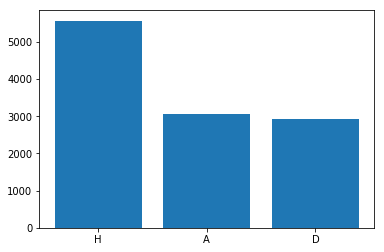

In [6]:
plt.bar(df_['Res'].value_counts().keys(),df_['Res'].value_counts())

### Nomes dos times

In [7]:
vocab = np.unique(np.concatenate((np.array(df_['Home'].unique()), np.array(df_['Away'].unique()))))

### Transformar em índices

In [8]:
word2idx = {word: i for i, word in enumerate(vocab)}

In [9]:
def word2vector(word):
    m = np.zeros(len(word2idx))
    m[word2idx.get(word)] = 1
    return m

In [10]:
# Transforma os dois times em um vetor com o flag do time correspondente
def prepare(H,A):
    
#     return([word2idx.get(H),word2idx.get(A)])
    
    return [word2vector(H), word2vector(A)]
#     return np.array(vec).reshape(np.array(vec).shape[1],2)



### Função para indexar os jogos

In [11]:
# def text_to_vector2(text): 
#     return word2idx.get(text, None)


### Indexar os resultados

In [15]:
X = []
y = []

for _, row in df_.iterrows():
    X.append(prepare(row['Home'], row['Away']))    
    
    n = -int(row['HG']) + int(row['AG'])
    
    if np.isnan(n):
        n = 0
    
    y.append([1,0,0] if n < 0 else [0,0,1] if n > 0 else [0,1,0])

y = np.array(y).reshape(np.array(y).shape[0],3)

X = np.array(X).reshape(np.array(X).shape[0],np.array(X).shape[2]*2)
    

### Modelo

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout

model = Sequential()
model.add(Dense(124, input_shape=(np.array(X).shape[1],), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(62, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(62, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Flatten())
model.add(Dense(3))
model.add(Activation('sigmoid'))

In [17]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


### Separar os datasets de treinamento e teste

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)

### Treinar o modelo

In [ ]:
model.fit(X_train, y_train, epochs=2000, batch_size=4000)

Epoch 1/2000
7745/7745 [==============================] - 1s 91us/step - loss: 0.3793 - acc: 0.8121
Epoch 2/2000
7745/7745 [==============================] - 1s 81us/step - loss: 0.3818 - acc: 0.8096
Epoch 3/2000
7745/7745 [==============================] - 1s 80us/step - loss: 0.3812 - acc: 0.8112
Epoch 4/2000
7745/7745 [==============================] - 1s 79us/step - loss: 0.3785 - acc: 0.8118
Epoch 5/2000
7745/7745 [==============================] - 1s 79us/step - loss: 0.3835 - acc: 0.8081
Epoch 6/2000
7745/7745 [==============================] - 1s 84us/step - loss: 0.3838 - acc: 0.8086
Epoch 7/2000
7745/7745 [==============================] - 1s 84us/step - loss: 0.3746 - acc: 0.8134
Epoch 8/2000
7745/7745 [==============================] - 1s 94us/step - loss: 0.3818 - acc: 0.8113
Epoch 9/2000
7745/7745 [==============================] - 1s 84us/step - loss: 0.3823 - acc: 0.8108
Epoch 10/2000
7745/7745 [==============================] - 1s 78us/step - loss: 0.3794 - acc: 0.8087

7745/7745 [==============================] - 1s 79us/step - loss: 0.3763 - acc: 0.8093
Epoch 83/2000
7745/7745 [==============================] - 1s 78us/step - loss: 0.3757 - acc: 0.8088
Epoch 84/2000
7745/7745 [==============================] - 1s 76us/step - loss: 0.3750 - acc: 0.8109
Epoch 85/2000
7745/7745 [==============================] - 1s 79us/step - loss: 0.3748 - acc: 0.8114
Epoch 86/2000
7745/7745 [==============================] - 1s 77us/step - loss: 0.3730 - acc: 0.8127
Epoch 87/2000
7745/7745 [==============================] - 1s 77us/step - loss: 0.3722 - acc: 0.8113
Epoch 88/2000
7745/7745 [==============================] - 1s 78us/step - loss: 0.3782 - acc: 0.8071
Epoch 89/2000
7745/7745 [==============================] - 1s 78us/step - loss: 0.3735 - acc: 0.8108
Epoch 90/2000
7745/7745 [==============================] - 1s 79us/step - loss: 0.3742 - acc: 0.8122
Epoch 91/2000
7745/7745 [==============================] - 1s 77us/step - loss: 0.3739 - acc: 0.8092
Epoc

7745/7745 [==============================] - 1s 78us/step - loss: 0.3747 - acc: 0.8080
Epoch 163/2000
7745/7745 [==============================] - 1s 78us/step - loss: 0.3710 - acc: 0.8122
Epoch 164/2000
7745/7745 [==============================] - 1s 78us/step - loss: 0.3681 - acc: 0.8119
Epoch 165/2000
7745/7745 [==============================] - 1s 80us/step - loss: 0.3720 - acc: 0.8108
Epoch 166/2000
7745/7745 [==============================] - 1s 77us/step - loss: 0.3761 - acc: 0.8089
Epoch 167/2000
7745/7745 [==============================] - 1s 80us/step - loss: 0.3742 - acc: 0.8115
Epoch 168/2000
7745/7745 [==============================] - 1s 97us/step - loss: 0.3725 - acc: 0.8127
Epoch 169/2000
7745/7745 [==============================] - 1s 91us/step - loss: 0.3704 - acc: 0.8123
Epoch 170/2000
7745/7745 [==============================] - 1s 88us/step - loss: 0.3727 - acc: 0.8119
Epoch 171/2000
7745/7745 [==============================] - 1s 79us/step - loss: 0.3693 - acc: 0.

7745/7745 [==============================] - 1s 78us/step - loss: 0.3705 - acc: 0.8093
Epoch 243/2000
7745/7745 [==============================] - 1s 78us/step - loss: 0.3665 - acc: 0.8131
Epoch 244/2000
7745/7745 [==============================] - 1s 77us/step - loss: 0.3714 - acc: 0.8093
Epoch 245/2000
7745/7745 [==============================] - 1s 78us/step - loss: 0.3661 - acc: 0.8129
Epoch 246/2000
7745/7745 [==============================] - 1s 77us/step - loss: 0.3693 - acc: 0.8127
Epoch 247/2000
7745/7745 [==============================] - 1s 76us/step - loss: 0.3689 - acc: 0.8130
Epoch 248/2000
7745/7745 [==============================] - 1s 77us/step - loss: 0.3676 - acc: 0.8110
Epoch 249/2000
7745/7745 [==============================] - 1s 78us/step - loss: 0.3734 - acc: 0.8098
Epoch 250/2000
7745/7745 [==============================] - 1s 77us/step - loss: 0.3696 - acc: 0.8124
Epoch 251/2000
7745/7745 [==============================] - 1s 79us/step - loss: 0.3664 - acc: 0.

7745/7745 [==============================] - 1s 79us/step - loss: 0.3645 - acc: 0.8100
Epoch 323/2000
7745/7745 [==============================] - 1s 78us/step - loss: 0.3618 - acc: 0.8133
Epoch 324/2000
7745/7745 [==============================] - 1s 78us/step - loss: 0.3654 - acc: 0.8124
Epoch 325/2000
7745/7745 [==============================] - 1s 77us/step - loss: 0.3640 - acc: 0.8130
Epoch 326/2000
7745/7745 [==============================] - 1s 78us/step - loss: 0.3664 - acc: 0.8099
Epoch 327/2000
7745/7745 [==============================] - 1s 76us/step - loss: 0.3649 - acc: 0.8126
Epoch 328/2000
7745/7745 [==============================] - 1s 77us/step - loss: 0.3652 - acc: 0.8108
Epoch 329/2000
7745/7745 [==============================] - 1s 78us/step - loss: 0.3635 - acc: 0.8126
Epoch 330/2000
7745/7745 [==============================] - 1s 78us/step - loss: 0.3654 - acc: 0.8118
Epoch 331/2000
7745/7745 [==============================] - 1s 80us/step - loss: 0.3648 - acc: 0.

7745/7745 [==============================] - 1s 90us/step - loss: 0.3607 - acc: 0.8139
Epoch 403/2000
7745/7745 [==============================] - 1s 79us/step - loss: 0.3645 - acc: 0.8133
Epoch 404/2000
7745/7745 [==============================] - 1s 78us/step - loss: 0.3657 - acc: 0.8118
Epoch 405/2000
7745/7745 [==============================] - 1s 78us/step - loss: 0.3615 - acc: 0.8138
Epoch 406/2000
7745/7745 [==============================] - 1s 79us/step - loss: 0.3645 - acc: 0.8111
Epoch 407/2000
7745/7745 [==============================] - 1s 76us/step - loss: 0.3664 - acc: 0.8139
Epoch 408/2000
7745/7745 [==============================] - 1s 78us/step - loss: 0.3645 - acc: 0.8120
Epoch 409/2000
7745/7745 [==============================] - 1s 77us/step - loss: 0.3612 - acc: 0.8122
Epoch 410/2000
7745/7745 [==============================] - 1s 77us/step - loss: 0.3605 - acc: 0.8141
Epoch 411/2000
7745/7745 [==============================] - 1s 79us/step - loss: 0.3638 - acc: 0.

In [27]:
model.evaluate(X_test, y_test, verbose=1)

3815/3815 [==============================] - 0s 98us/step


[1.3586324231965201, 0.6465705583636132]

### Avaliar precisão

In [28]:
dfx = df_[int(-df_.shape[0]/20):]
prec = []
for idx, dfr in dfx.iterrows():
    
    prep = [prepare(dfr['Home'],dfr['Away'])]
    
    prepx = np.array(prep).reshape(np.array(prep).shape[0],np.array(prep).shape[2]*2)
    
    p = model.predict(prepx)
    
    if p[0,0] > p[0,1] and p[0,0] > p[0,2]:
        px = 'H'
        
    if p[0,2] > p[0,1] and p[0,2] > p[0,0]:
        px = 'A'
        
    if p[0,1] > p[0,0] and p[0,1] > p[0,2]:
        px = 'D'
    
    prec.append(1 if px == dfr['Res'] else 0)
    
    dfx.loc[idx]['S'] = 'G' if px == dfr['Res'] else 'P'

print(round((abs(np.mean(prec))) * 100,0), '%')
    

64.0 %


In [29]:
dfx[dfx['S']=='G'].groupby(['Concurso'])['S'].value_counts()

Concurso                   S
Concurso 785 (05/02/2018)  G     2
Concurso 786 (14/02/2018)  G    11
Concurso 787 (20/02/2018)  G     7
Concurso 788 (26/02/2018)  G    11
Concurso 789 (05/03/2018)  G     9
Concurso 790 (12/03/2018)  G     7
Concurso 791 (19/03/2018)  G     7
Concurso 792 (26/03/2018)  G    13
Concurso 793 (02/04/2018)  G    12
Concurso 794 (09/04/2018)  G    11
Concurso 795 (16/04/2018)  G    10
Concurso 796 (23/04/2018)  G     9
Concurso 797 (30/04/2018)  G     7
Concurso 798 (07/05/2018)  G     7
Concurso 799 (14/05/2018)  G     7
Concurso 800 (21/05/2018)  G    11
Concurso 801 (28/05/2018)  G     8
Concurso 802 (04/06/2018)  G     7
Concurso 803 (11/06/2018)  G     6
Concurso 804 (18/06/2018)  G    13
Concurso 805 (25/06/2018)  G    11
Concurso 806 (28/06/2018)  G    10
Concurso 807 (02/07/2018)  G     9
Concurso 808 (09/07/2018)  G    13
Concurso 809 (16/07/2018)  G     9
Concurso 810 (23/07/2018)  G    10
Concurso 811 (30/07/2018)  G     9
Concurso 812 (06/08/2018) 

<BarContainer object of 2 artists>

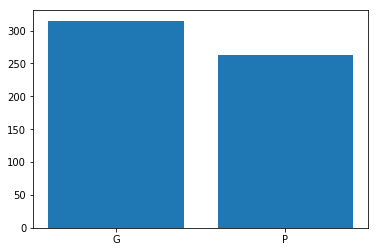

In [25]:
plt.bar(dfx['S'].value_counts().keys(),dfx['S'].value_counts())

### Lista de times

In [ ]:
vocab

### Realizar previsão

In [ ]:
H = 'ATLÉTICO/MG'
A = 'SANTOS/SP'

prep = [prepare(H,A)]
    
prepx = np.array(prep).reshape(np.array(prep).shape[0],np.array(prep).shape[1]*2)
    
p = model.predict(prepx)


print(p)
